# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-4-연속형변수 관계-4 (61일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 연속형 변수의 관계 찾기

## 과연 아빠의 키는 아들 키에 얼마나 큰 영향을 줄까?  - 선형회귀 결정계수


예전에 피어슨 통계학자가 아빠키와 아들키의 관계에 관심을 가지고 1978쌍의 키 데이터를 모았습니다. 이제 이것을 가지고 분석하고자 합니다.

먼저 read.csv() 함수로 데이터를 불러오기로 합니다.

### 1. 파일 읽기

In [1]:
# 파일 읽기
heights <- read.csv("Practice/data/heights.csv")

cat("변수이름들=", names(heights), "\n")
head(heights) 

## 원래 파일을 사용하려면 father.son 데이터를 가져와야 합니다.
#install.packages("UsingR")
#library(UsingR)
#data(father.son)


변수이름들= father son 


father,son
165.2,151.8
160.7,160.6
165.0,160.9
167.0,159.5
155.3,163.3
160.1,163.2


### 2. 데이터 요약

In [2]:
cat("아빠 평균키=",mean(heights$father), "\n")
cat("아빠 중간값=",median(heights$father), "\n")
cat("아빠 최댓값=",max(heights$father), "\n")
cat("아빠 최솟값=",min(heights$father), "\n")
cat("아빠 최솟값=",min(heights$father), "\n")
cat("아빠 범위=",range(heights$father), "\n")
cat("아빠 사분위=",quantile(heights$father), "\n\n")

cat("아빠 분산=",var(heights$father), "\n")
cat("아빠 표준편차=",sd(heights$father), "\n\n\n")


cat("아들 평균키=",mean(heights$son), "\n")
cat("아들 중간값=",median(heights$son), "\n")

cat("아들 최댓값=",max(heights$son), "\n")
cat("아들 최솟값=",min(heights$son), "\n")
cat("아들 최솟값=",min(heights$son), "\n")
cat("아들 범위=",range(heights$son), "\n")
cat("아들 사분위=",quantile(heights$son), "\n\n")

cat("아들 분산=",var(heights$son), "\n")
cat("아들 표준편차=",sd(heights$son), "\n\n\n")

아빠 평균키= 171.9252 
아빠 중간값= 172.1 
아빠 최댓값= 191.6 
아빠 최솟값= 149.9 
아빠 최솟값= 149.9 
아빠 범위= 149.9 191.6 
아빠 사분위= 149.9 167.1 172.1 176.8 191.6 

아빠 분산= 48.61361 
아빠 표준편차= 6.972346 


아들 평균키= 174.4572 
아들 중간값= 174.3 
아들 최댓값= 199 
아들 최솟값= 148.6 
아들 최솟값= 148.6 
아들 범위= 148.6 199 
아들 사분위= 148.6 170 174.3 179 199 

아들 분산= 51.1327 
아들 표준편차= 7.150713 




선형회귀 를 R 에서 해보면 다음과 같습니다.

In [3]:
lm_height = lm(son ~ father, data = heights)

* data : 사용하는 데이터 변수
* 모형식 (formula) : 모형식은 관심갖는 변수의 관계를 설정하는데 사용합니다. 이번 경우에는 아들키 가 아빠키와 관계에 관심을 가지고 있습니다. 즉 아들키를 아빠키로 설명하고자 합니다. 이런 경우 아들키 를 먼저 표시하고 다음 "~" 를 사용하고 나서 아빠키를 표시합니다. 즉 son ~ father 가 됩니다.

이제 결과를 확인해 보자.

In [4]:
summary(lm_height)


Call:
lm(formula = son ~ father, data = heights)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.5957  -3.8614   0.0091   4.1230  22.7570 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.10257    4.65558   18.49   <2e-16 ***
father       0.51391    0.02706   18.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.191 on 1076 degrees of freedom
Multiple R-squared:  0.2511,	Adjusted R-squared:  0.2504 
F-statistic: 360.8 on 1 and 1076 DF,  p-value: < 2.2e-16


* 제일 먼저 관심 가질 값은 father 의 p 값입니다. 이값은 father 의 t 값 18.99 가 회귀모형 $\beta_1$ 의 유의성을 따지기 떄문입니다.  이에 대한 것은 따로 회귀 분석에서 다시 정리 할 예정입니다. 단 여기서는 $\beta_1$ 이 유의하며 따라서 회귀모형이 의미있는지 여부를 따지기만 합니다.  
* 여기서는 t 값의 유의성에 대한 것인데 위 결과에서는 $Pr(\gt |t|)$ 에서 $Pr(t > |18.99|)$ 를 따지는 것으로 거의 0 입니다.
* 즉 $\beta_1$ , 아빠키의 아들에 대한 영향력이 크다고 할 수 있다고 해석됩니다.
* 이것은 귀무가설 $H_0$ 가 $\beta_1$ 이 0 인지 아닌지 검정하는 것입니다.

 아들 키는 Estimate 의 86.10 을 y 축 절편으로 하여 아빠키에 0.51391 곱한만큼 결정됩니다.  
 즉

$$
아들키 = 0.51391 \times 아빠키 + 86.10257 
$$

입니다. 이것은 이전에 구한것과 같은 결과입니다. 

그래프에 구한 회귀식을 같이 표시하면 다음과 같습니다.

182cm 근처에서 아들키의 분포를 포함한 전체 그래프는 다음과 같습니다.

In [52]:
scatterhistaline_lm_near = function(heights, near, xlab="", ylab=""){

  x = heights$father
  y = heights$son
    
  nearl = near - 0.5
  nearh = near + 0.5
    
  zones=matrix(c(2,0,1,3), ncol=2, byrow=TRUE)
  layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))
  xhist = hist(x, plot=FALSE)
  yhist = hist(y, plot=FALSE)
  top = max(c(xhist$counts, yhist$counts))
  par(mar=c(3,3,1,1))
  plot(x,y, pch=16, col=rgb(0.2,0.2,0.2,0.5))
  abline(v=mean(x), lty=2)
  abline(h=mean(y), lty=2)
# 회귀식 추가
  abline(a=86.10257, b=0.51391, lty=1, col="red")
    
# 아빠키가 near 근처 +- 0.5 근처 표시
  abline(v=c(nearl, nearh, lty = 3))
 # with(subset(heights, heights$father >= nearl & heights$son < nearh), points(heights$father,heights$son, col="blue"))

  par(mar=c(0,3,1,1))
  barplot(xhist$counts, axes=FALSE, ylim=c(0, top), space=0)
  par(mar=c(3,0,1,1))
  barplot(yhist$counts, axes=FALSE, xlim=c(0, top), space=0, horiz=TRUE)
  par(oma=c(3,3,0,0))
  mtext(xlab, side=1, line=1, outer=TRUE, adj=0, at=.8 * (mean(x) - min(x))/(max(x)-min(x)))
  mtext(ylab, side=2, line=1, outer=TRUE, adj=0, at=(.8 * (mean(y) - min(y))/(max(y) - min(y))))
}

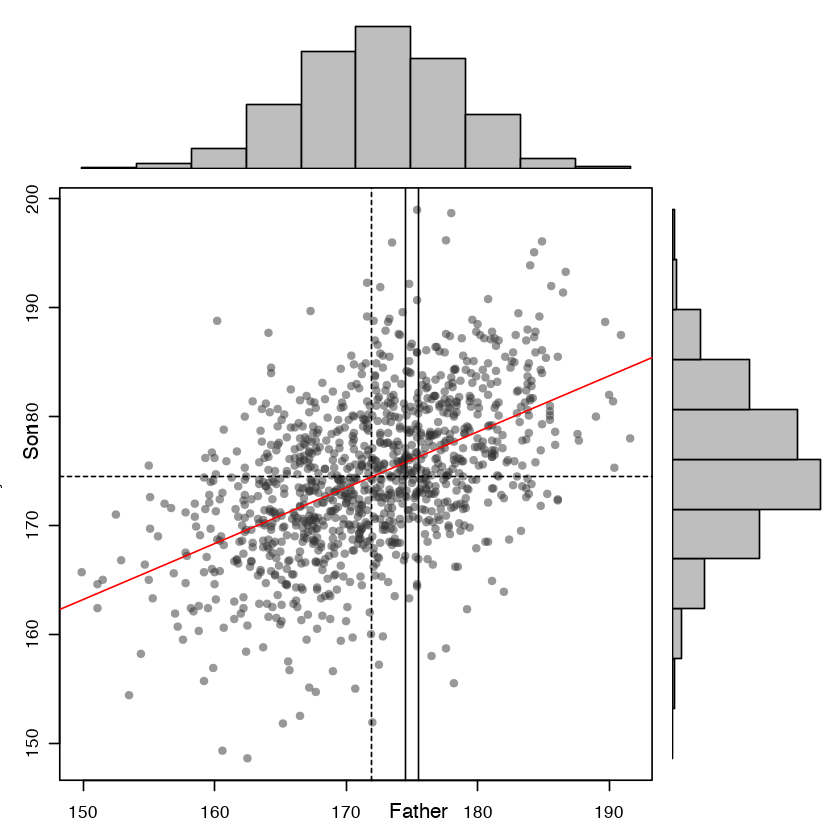

In [53]:
scatterhistaline_lm_near(heights, 175, xlab="Father", ylab="Son")

다음은 페이지 223 을 다시 리뷰하고 R-squared 결정계수에 대해서 정리합니다.

지금까지 결과를 보면 아들키는 86.97 cm 에 아빠키의 0.514배르를 한 값을 더한것으로 설명 할 수 있습니다. 그러나 아들키를 100% 예측은 할 수 없습니다. 그 이유를 설명하고자 합니다.

지금 위 그래프에서 아빠키가 175 인 경우 아들키는 

In [25]:
0.51391* 175+86.10257

[1] 176.0368

즉 176.04 cm 나와야 합니다. 그러나 위그래프에서 보면 180 근처에서 아들키는 대략 167 cm ~ 애서 187 cm 에 걸쳐 있습니다. 즉 아들키는 178.6 cm 가 아니라 178.6 보다 작을 수도 클 수도 있습니다. 즉 180 근처의 아들키를 히스토 그램으로 표시하면 다음과 같습니다.

In [66]:
selectson = subset(heights, heights$father >= 174.5  & heights$father < 175.5)
#selectson = subset(heights, heights$father == 175)

,father,son
67,175.2,171.7
68,175.1,170.8
94,174.5,172.7
96,174.6,172.6
123,174.5,176.4
147,175.4,178.1


0%    25%    50%    75%   100% 
163.30 173.05 176.25 180.20 199.00

[1] 199

[1] 163.3

[1] 177.1017

[1] 6.627178

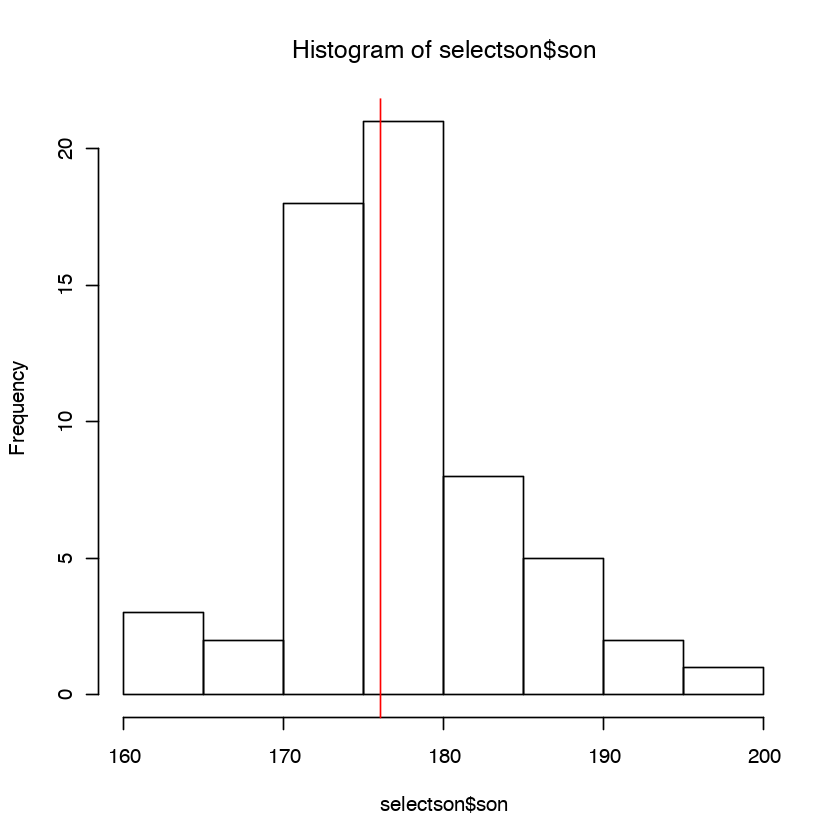

In [67]:
head(selectson)
quantile(selectson$son)
max(selectson$son)
min(selectson$son)
mean(selectson$son)
sd(selectson$son)
hist(selectson$son)
abline(v=176.03682,col="red")

아빠 키 175 근처에서 아들 키는 176.04 이고 (붉은수직선) 근처에서 개략적인 정규분포를 가지고 있습니다. 이것이 적은 관측값일 경우에는 t 분포를 고려 해야 하겠습니다.  이 그래프에서 보이는 것은 우리가 예측한 아들키는 176.04 이지만 실제 관측된 값에서 보면 키는 163 cm ~ 에서 199 cm 입니다.

선형회귀분석에서 관심변수를 잘 설명하는지는 분산분해를 이용한 결정계수입니다.  위 예제에서 보면 아빠키가 175인 경우 아들키는 177 에 표준편차 는 6.63 인 정규분포를 가지고 있습니다. 이것의 관계를 표시하면 다음과 같습니다.

아들 키를 $y$, 아빠키를 $x$ 라고 하면 모집단에서 회귀모형은 
$$
y = \beta_0 + \beta x + \epsilon \; (\epsilon \sim n(0, \sigma^2)
$$

로 할 수 있으다. 여기서 $\epsilon$ 은 평균이 0이고 표준편차가 $\sigma$ 인 정규분포를 따른다. 이것은 우리 예제에서

$$
y = 86.07 + 0.514 x + \epsilon 
$$

으로 표현 됩니다.

그럼 회귀식은 우리 관측된 것으로 부터 결정해야 하므로 회귀식은 hat 로 표시하여
$$
\hat y = b_0 + b_1 x 
$$

로 표시하고 이것은 우리 예제에서 
$$
\hat y = 86.07 + 0.514 x
$$
로 표시 할 수 있습니다.

그러면 우리가 관심있는 $\beta_1$ 의 추정량 $b_1$ 에 대해서
* 평균은 $\beta_1$ 이고 분산은 $\dfrac{\sigma^2}{(n-1)S_x^2} $ 이다.
* $b_1$ 을 정규화한 $\frac{b_1 - \beta_1}{(\sigma/\sqrt{(n-1)S_x^2})}$ 은 표준 정규분포입니다.
   * 이것은 $\epsilon$ 이 정규분포이므로 $b_1$ 도 당연히 정규분포를 따르게 된다.

이제 관측값 y , y 평균, 그리고 표본에서 회귀식  $\hat y$ 의 관계를 찾아보자고 합니다.

In [142]:
fno <- 1:length(heights$father)
son.dataframe <- data.frame(fno)
son.dataframe["father"] <- heights$father
son.dataframe["son"] <- heights$son

expected <- 86.07 + 0.514 * heights$father
average <- rep(mean(heights$son), length(heights$son))
son.dataframe["mean"] <- average
son.dataframe["expected"] <- expected

names(son.dataframe) <- c("family_no", "father", "son", "mean", "expected")

head(son.dataframe)

family_no,father,son,mean,expected
1,165.2,151.8,174.4572,170.9828
2,160.7,160.6,174.4572,168.6698
3,165.0,160.9,174.4572,170.8800
4,167.0,159.5,174.4572,171.9080
5,155.3,163.3,174.4572,165.8942
6,160.1,163.2,174.4572,168.3614


먼저 $(y_i - \bar y)^2$ 을 계산하자.

* $\sum_{i=1}^{1078}(y_i - \bar y)^2$

In [143]:
y_ybar <- abs(son.dataframe$son - son.dataframe$mean)
son.dataframe["y_ybar"] <- y_ybar
son.dataframe["y_ybar_squre"] <- y_ybar^2


head(son.dataframe)
sum(son.dataframe$y_ybar_squre)

family_no,father,son,mean,expected,y_ybar,y_ybar_squre
1,165.2,151.8,174.4572,170.9828,22.65724,513.3503
2,160.7,160.6,174.4572,168.6698,13.85724,192.0230
3,165.0,160.9,174.4572,170.8800,13.55724,183.7986
4,167.0,159.5,174.4572,171.9080,14.95724,223.7189
5,155.3,163.3,174.4572,165.8942,11.15724,124.4839
6,160.1,163.2,174.4572,168.3614,11.25724,126.7254


[1] 55069.92

다음 $(\hat y_i - \bar y)^2$ 를 계산해보자

* $\sum_{i=1}^{1078}(\hat y_i - \bar y)^2$

In [145]:
yhat_ybar <- abs(son.dataframe$expected - son.dataframe$mean)
son.dataframe["yhat_ybar"] <- yhat_ybar
son.dataframe["yhat_ybar_squre"] <- yhat_ybar^2

head(son.dataframe)
sum(son.dataframe$yhat_ybar_squre)

family_no,father,son,mean,expected,y_ybar,y_ybar_squre,yhat_ybar,yhat_ybar_squre
1,165.2,151.8,174.4572,170.9828,22.65724,513.3503,3.474436,12.071703
2,160.7,160.6,174.4572,168.6698,13.85724,192.0230,5.787436,33.494411
3,165.0,160.9,174.4572,170.8800,13.55724,183.7986,3.577236,12.796615
4,167.0,159.5,174.4572,171.9080,14.95724,223.7189,2.549236,6.498602
5,155.3,163.3,174.4572,165.8942,11.15724,124.4839,8.563036,73.325579
6,160.1,163.2,174.4572,168.3614,11.25724,126.7254,6.095836,37.159212


[1] 13832.81

다음 실제값가 예상값의 차이를 계산합니다. $(y_i - \hat y_i)^2$
* $\sum_{i=1}^{1078} (y_i - \hat y_i)^2$

In [146]:
y_yhat <- abs(son.dataframe$son - son.dataframe$expected)
son.dataframe["y_yhat"] <- y_yhat
son.dataframe["y_yhat_squre"] <- y_yhat^2

head(son.dataframe)
sum(son.dataframe$y_yhat_squre)

family_no,father,son,mean,expected,y_ybar,y_ybar_squre,yhat_ybar,yhat_ybar_squre,y_yhat,y_yhat_squre
1,165.2,151.8,174.4572,170.9828,22.65724,513.3503,3.474436,12.071703,19.1828,367.979816
2,160.7,160.6,174.4572,168.6698,13.85724,192.0230,5.787436,33.494411,8.0698,65.121672
3,165.0,160.9,174.4572,170.8800,13.55724,183.7986,3.577236,12.796615,9.9800,99.600400
4,167.0,159.5,174.4572,171.9080,14.95724,223.7189,2.549236,6.498602,12.4080,153.958464
5,155.3,163.3,174.4572,165.8942,11.15724,124.4839,8.563036,73.325579,2.5942,6.729874
6,160.1,163.2,174.4572,168.3614,11.25724,126.7254,6.095836,37.159212,5.1614,26.640050


[1] 41242.45

이제 세곱들의 관계를 찾아보면 다음과 같습니다.

In [147]:
sum(son.dataframe$y_ybar_squre)
sum(son.dataframe$yhat_ybar_squre) + sum(son.dataframe$y_yhat_squre)

[1] 55069.92

[1] 55075.26

위 두개의 숫자를 비교하면 거의 비숫하게 나옵니다. 실제로는 같은 값이지만,소숫점 처리 등으로 인하여 차이가 났습니다. 좀더 소숫점에서 정밀하게 처리한다면 같은 값으로 나올 것입니다.

#### 결정계수 

위 숫자 중에서 선형회귀와 관계 있는 숫자는 yhat 과 ybar 차이의 제곱에 관한 항입니다. 즉 평균값 - 기대값 의 제곱에 대한 항입니다. 이 값이 실제 선형회귀에서 설명할 수 있는 부분으로 전체 분산에서 이값에 대한 비를 **결정계수** 라고 합니다. 즉 모형은 이렇게설명 할 수 있는 부분하고, 그렇지 않고 정규분포에 의존하는 설명하지 못하는 부분이 있는데, 결정계수는 이중에서 전체분산 에 대한 (평균값 - 기대값) 의 제곱에 대한 비 입니다. 이것의 값은 다음과 같습니다.

In [154]:
R_squre = sum(son.dataframe$yhat_ybar_squre)  / sum(son.dataframe$y_ybar_squre)
R_squre

sqrt(R_squre)

[1] 0.2511863

[1] 0.5011849

즉 25% 입니다. 이 값은 실제로는 상관계수의 제곱에 해당합니다. 

In [153]:
r1 = cor(heights$son, heights$father)
r1
r1^2

[1] 0.5010942

[1] 0.2510954

전체 분산중에서 모형이 설명되는 부분을 결정계수 라고 하고 $R^2$ 으로 표현합니다. 이 예에서는 25% 입니다. 그럼 나머지 75%는 엄마의 영향 또는 환경과 같은 우리가 알 수 없는 부분입니다.  

모형중에서 필요한 의미 있는 변수를 찾아내는 경우 t-검정을 이용하고, F-검정을 이용하여 모형이 쓸모있는 지를 검정합니다. 즉 위 예에서 실제 25%만 설명이 가능하고 나머지 75%는 설명이 불가능하다고 하면 가정에 의한 선형모델이 의미 있는지 여부가 의문이 생기는데, 이것은 F-검정을 이용해서 확인하게 됩니다. 이부부은 따로 선형회기 부분 정리에서 다시 설명 할 예정입니다.

다시 327 페이지 아빠 아들키 선형회귀 분석 결과로 돌아와서


In [155]:
summary(lm_height)


Call:
lm(formula = son ~ father, data = heights)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.5957  -3.8614   0.0091   4.1230  22.7570 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.10257    4.65558   18.49   <2e-16 ***
father       0.51391    0.02706   18.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.191 on 1076 degrees of freedom
Multiple R-squared:  0.2511,	Adjusted R-squared:  0.2504 
F-statistic: 360.8 on 1 and 1076 DF,  p-value: < 2.2e-16


마지막줄 바로 위 보면 R-squred rㅏㅂㅅ이 0.2511 이 나옵니다. 이것이 바로 전에 계산한 결정계수 입니다. 이것은 상관계수의 제곱근에 해당합니다. 또한 결정할 수 없는 부분이 75%이나 F-검정에서 보면 역시 P-값이 거의 0에 해당합니다. 즉 아들키를 전체 평균으로 계산하는 것보다는 아빠키를 이용하여 설명하는 것이 매의 의미 있다는 것을 말합니다.  이부분은 선형회귀에서 상세하게 다를 예정입니다.